In [56]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# BASELINES (Accuracy)

# --- ADHD1     65 *
# --- ADHD3     54 *
# --- ADHD5     51 *
# --- ADHD6     54 *
# --- HSJ       64 *
# --- SZ3       52 *
# --- SZ6       66 *
# --- Svip1     62 *
# --- Svip2     53 *
# --- UCLA_CB   51 *
# --- UCLA_DS1  54 *
# --- UKBB11025 53 *
# --- UKBB11026 55 *
# --- UKBB11027 56 *

# 51 - ADHD5, UCLA_CB
# 52 - SZ3
# 53 - Svip2, UKBB11025
# 54 - ADHD3, ADHD6, UCLA_DS1
# 55 - UKBB11026
# 56 - UKBB11027
# 62 - Svip1
# 64 - HSJ
# 65 - ADHD1
# 66 - SZ6

In [76]:
# BASELINES (F1)

# 0.68 - ADHD5, UCLA_CB, SZ3
# 0.69 - Svip2, UKBB11025
# 0.70 - ADHD3, ADHD6, UCLA_DS1
# 0.71 - UKBB11026
# 0.72 - UKBB11027
# 0.77 - Svip1
# 0.78 - HSJ
# 0.79 - ADHD1
# 0.80 - SZ6

In [75]:
for x in [51,52,53,54,55,56,62,64,65,66]:
    x /= 100
    print(np.round(2*(x)/(x + 1),2))

0.68
0.68
0.69
0.7
0.71
0.72
0.77
0.78
0.79
0.8


In [58]:
#sites = ['ADHD1',
#        'ADHD3',
#        'ADHD5',
#        'ADHD6',
#        'HSJ',
#        'Svip1',
#        'Svip2',
#        'SZ3',
#        'SZ6',
#        'UCLA_CB',
#        'UCLA_DS1',
#        'UKBB11025',
#        'UKBB11026',
#        'UKBB11027']

# Order by n in site
sites = ['SZ3',
        'SZ6',
        'Svip2',
        'ADHD6',
        'HSJ',
        'UCLA_CB',
        'Svip1',
        'UKBB11026',
        'UKBB11027',
        'UKBB11025',
        'ADHD1',
        'ADHD3',
        'ADHD5',
        'UCLA_DS1']

#p_sex = './results/sex/'
p_sex = '../../results_reviews/sex/'

In [59]:
"""
nsite = {'ABIDEII-BNI_1': 6,
 'ABIDEII-ETH_1': 23,
 'ABIDEII-GU_1': 26,
 'ABIDEII-IP_1': 7,
 'ABIDEII-IU_1': 3,
 'ABIDEII-KKI_1': 17,
 'ABIDEII-NYU_1': 27,
 'ABIDEII-OHSU_1': 27,
 'ABIDEII-OILH_2': 13,
 'ABIDEII-SDSU_1': 21,
 'ABIDEII-SU_2': 7,
 'ABIDEII-TCD_1': 18,
 'ABIDEII-UCD_1': 10,
 'ABIDEII-UCLA_1': 9,
 'ABIDEII-USM_1': 13,
 'ABIDEII-U_MIA_1': 10,
 'ADHD1': 54,
 'ADHD3': 56,
 'ADHD4': 14,
 'ADHD5': 77,
 'ADHD6': 39,
 'Cardiff': 8,
 'HSJ': 39,
 'KKI': 22,
 'LEUVEN_1': 5,
 'MAX_MUN': 11,
 'NYU': 66,
 'OLIN': 8,
 'SDSU': 13,
 'SZ1': 42,
 'SZ10': 9,
 'SZ2': 41,
 'SZ3': 31,
 'SZ4': 25,
 'SZ5': 17,
 'SZ6': 35,
 'SZ7': 14,
 'SZ8': 14,
 'SZ9': 14,
 'Svip1': 48,
 'Svip2': 36,
 'TRINITY': 25,
 'UCLA_1': 24,
 'UCLA_2': 5,
 'UCLA_CB': 43,
 'UCLA_DS1': 94,
 'UCLA_DS2': 19,
 'UKBB11025': 1000,
 'UKBB11026': 1000,
 'UKBB11027': 1000,
 'UM_1': 10,
 'USM': 30,
 'YALE': 15}
"""
# for paper UKBB cap at 50
nsite = {'ABIDEII-BNI_1': 6,
 'ABIDEII-ETH_1': 23,
 'ABIDEII-GU_1': 26,
 'ABIDEII-IP_1': 7,
 'ABIDEII-IU_1': 3,
 'ABIDEII-KKI_1': 17,
 'ABIDEII-NYU_1': 27,
 'ABIDEII-OHSU_1': 27,
 'ABIDEII-OILH_2': 13,
 'ABIDEII-SDSU_1': 21,
 'ABIDEII-SU_2': 7,
 'ABIDEII-TCD_1': 18,
 'ABIDEII-UCD_1': 10,
 'ABIDEII-UCLA_1': 9,
 'ABIDEII-USM_1': 13,
 'ABIDEII-U_MIA_1': 10,
 'ADHD1': 54,
 'ADHD3': 56,
 'ADHD4': 14,
 'ADHD5': 77,
 'ADHD6': 39,
 'Cardiff': 8,
 'HSJ': 39,
 'KKI': 22,
 'LEUVEN_1': 5,
 'MAX_MUN': 11,
 'NYU': 66,
 'OLIN': 8,
 'SDSU': 13,
 'SZ1': 42,
 'SZ10': 9,
 'SZ2': 41,
 'SZ3': 31,
 'SZ4': 25,
 'SZ5': 17,
 'SZ6': 35,
 'SZ7': 14,
 'SZ8': 14,
 'SZ9': 14,
 'Svip1': 48,
 'Svip2': 36,
 'TRINITY': 25,
 'UCLA_1': 24,
 'UCLA_2': 5,
 'UCLA_CB': 43,
 'UCLA_DS1': 94,
 'UCLA_DS2': 19,
 'UKBB11025': 50,
 'UKBB11026': 50,
 'UKBB11027': 50,
 'UM_1': 10,
 'USM': 30,
 'YALE': 15}

# Load Data

In [60]:
# Single Task
st_data = []
for site in sites:
    folds = []
    for fold in range(5):
        p_parent = os.path.join(p_sex, f"{site}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        folds.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[site])
    st_data.append(folds)

st_data = dict(zip(sites,st_data))

In [61]:
# Multi-task
mtl_data = []
for fold in range(5):
    p_parent = os.path.join(p_sex, f"all/fold_{fold}")
    file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
    mtl_data.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))


# Get Scores

In [62]:
# Single Task
st_acc = []
st_f1 = []
st_auc = []
for site in sites:
    # Accuracy
    st_acc.append([st_data[site][fold]['Accuracy/test'].iloc[-1] for fold in range(5)])

    # F1
    st_f1.append([st_data[site][fold]['F1/test'].iloc[-1] for fold in range(5)])

    # AUC
    st_auc.append([st_data[site][fold]['AUC/test'].iloc[-1] for fold in range(5)])

st_acc = pd.DataFrame(st_acc,index=sites)
st_acc_std = st_acc.std(axis=1)
st_acc_mean = st_acc.mean(axis=1)

st_f1 = pd.DataFrame(st_f1,index=sites)
st_f1_std = st_f1.std(axis=1)
st_f1_mean = st_f1.mean(axis=1)

st_auc = pd.DataFrame(st_auc,index=sites)
st_auc_std = st_auc.std(axis=1)
st_auc_mean = st_auc.mean(axis=1)

In [63]:
# Multi-task
mtl_acc = []
mtl_f1 = []
mtl_auc = []
for fold in range(5):
    df = mtl_data[fold].transpose().reset_index()
    
    # Accuracy
    mtl_acc.append(df[df['level_1']=='Accuracy/test'].set_index('level_0')[99])

    # F1
    mtl_f1.append(df[df['level_1']=='F1/test'].set_index('level_0')[99])

    # AUC
    mtl_auc.append(df[df['level_1']=='AUC/test'].set_index('level_0')[99])
    
mtl_acc = pd.concat(mtl_acc,axis=1)
mtl_acc_std = mtl_acc.std(axis=1)
mtl_acc_mean = mtl_acc.mean(axis=1)

mtl_f1 = pd.concat(mtl_f1,axis=1)
mtl_f1_std = mtl_f1.std(axis=1)
mtl_f1_mean = mtl_f1.mean(axis=1)

mtl_auc = pd.concat(mtl_auc,axis=1)
mtl_auc_std = mtl_auc.std(axis=1)
mtl_auc_mean = mtl_auc.mean(axis=1)

# Tables

In [64]:
df = pd.concat([st_acc_mean,mtl_acc_mean,st_acc_std,mtl_acc_std,
                     st_f1_mean,mtl_f1_mean,st_f1_std,mtl_f1_std,
                     st_auc_mean,mtl_auc_mean,st_auc_std,mtl_auc_std],axis=1)
df.columns = ['ST_mean_acc','MTL_mean_acc','ST_std_acc','MTL_std_acc',
                   'ST_mean_f1','MTL_mean_f1','ST_std_f1','MTL_std_f1',
                   'ST_mean_auc','MTL_mean_auc','ST_std_auc','MTL_std_auc']

df

,ST_mean_acc,MTL_mean_acc,ST_std_acc,MTL_std_acc,ST_mean_f1,MTL_mean_f1,ST_std_f1,MTL_std_f1,ST_mean_auc,MTL_mean_auc,ST_std_auc,MTL_std_auc
SZ3,61.904762,68.571429,25.863763,20.370714,0.633333,0.683810,0.217307,0.228611,0.716667,0.827778,0.211914,0.157625
SZ6,62.857143,71.428571,16.288220,14.285714,0.340000,0.553333,0.343511,0.175752,0.660000,0.693333,0.235879,0.212655
Svip2,61.071429,50.000000,6.237232,21.428571,0.591905,0.497619,0.130623,0.213358,0.616667,0.516667,0.217307,0.180662
ADHD6,48.928571,51.428571,14.374723,9.398355,0.463333,0.437143,0.152934,0.151426,0.505833,0.600000,0.186911,0.227932
HSJ,41.428571,48.571429,12.461676,9.398355,0.501313,0.562222,0.162344,0.088750,0.400000,0.546667,0.105409,0.086923
UCLA_CB,50.555556,53.888889,22.082897,14.346624,0.310101,0.349524,0.195070,0.155897,0.506250,0.582083,0.148166,0.047772
Svip1,56.000000,60.222222,6.740334,16.784767,0.157143,0.246667,0.155766,0.211279,0.476250,0.482500,0.199259,0.185461
UKBB11026,80.000000,80.000000,7.071068,15.811388,0.765556,0.700909,0.223025,0.349031,0.725417,0.806667,0.155640,0.193864
UKBB11027,74.000000,76.000000,11.401754,8.944272,0.871169,0.852222,0.048231,0.048008,0.739167,0.841250,0.181181,0.170365
UKBB11025,62.000000,62.000000,10.954451,19.235384,0.601166,0.768974,0.189986,0.124056,0.556726,0.710417,0.241001,0.268560


In [65]:
df.mean()

ST_mean_acc     59.934962
MTL_mean_acc    62.368051
ST_std_acc      12.793712
MTL_std_acc     13.623297
ST_mean_f1       0.536337
MTL_mean_f1      0.562114
ST_std_f1        0.176444
MTL_std_f1       0.169626
ST_mean_auc      0.613248
MTL_mean_auc     0.665000
ST_std_auc       0.183331
MTL_std_auc      0.165539
dtype: float64

# Plots

In [66]:
lenmax = 25
site_labels = []
for site in sites:
    n = f'{nsite[site]}'
    nspaces = lenmax - 2*len(site) - len(n)
    label = site.upper()+(' '*nspaces)+f'n={n}'
    site_labels.append(label)
    print(f"'{label}',")

'SZ3                 n=31',
'SZ6                 n=35',
'SVIP2             n=36',
'ADHD6             n=39',
'HSJ                 n=39',
'UCLA_CB         n=43',
'SVIP1             n=48',
'UKBB11026     n=50',
'UKBB11027     n=50',
'UKBB11025     n=50',
'ADHD1             n=54',
'ADHD3             n=56',
'ADHD5             n=77',
'UCLA_DS1       n=94',


In [67]:
#site_labels = [
#'SZ3                   n=31',
#'SZ6                   n=35',
#'SVIP2               n=36',
#'ADHD6             n=39',
#'HSJ                   n=39',
#'UCLA_CB         n=43',
#'SVIP1               n=48',
#'ADHD1             n=54',
#'ADHD3             n=56',
#'ADHD5             n=77',
#'UCLA_DS1       n=94',
#'UKBB11026   n=1000',
#'UKBB11027   n=1000',
#'UKBB11025   n=1000']

site_labels = [
'SZ3                 n=31',
'SZ6                 n=35',
'SVIP2             n=36',
'ADHD6           n=39',
'HSJ                 n=39',
'UCLA_CB       n=43',
'SVIP1             n=48',
'UKBB11026    n=50',
'UKBB11027    n=50',
'UKBB11025    n=50',
'ADHD1           n=54',
'ADHD3           n=56',
'ADHD5           n=77',
'UCLA_DS1     n=94']

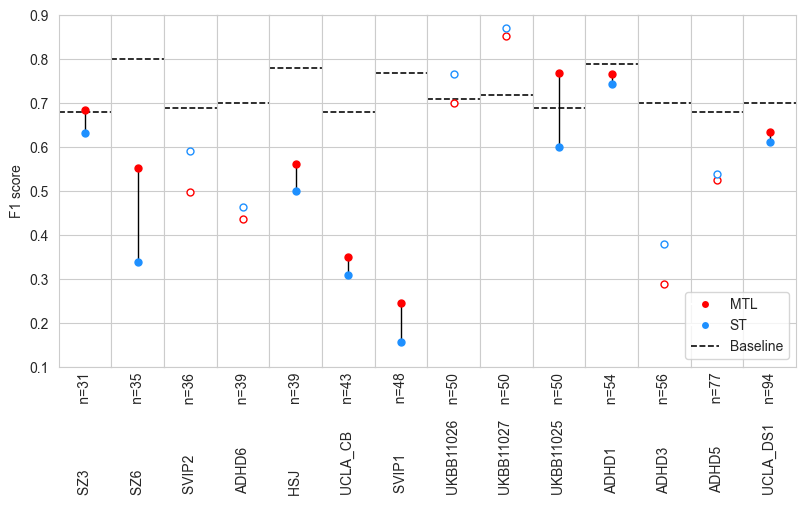

In [84]:
######
# F1 #
######
# 0.68 - ADHD5, UCLA_CB, SZ3
# 0.69 - Svip2, UKBB11025
# 0.70 - ADHD3, ADHD6, UCLA_DS1     # annoying
# 0.71 - UKBB11026
# 0.72 - UKBB11027
# 0.77 - Svip1
# 0.78 - HSJ
# 0.79 - ADHD1
# 0.80 - SZ6                        # annoying
special_lines = {6:['ADHD5','UCLA_CB','SZ3'],
                 7: ['Svip2','UKBB11025'],
                 8: ['ADHD3','ADHD6','UCLA_DS1'],
                 9: ['UKBB11026'],
                 10: ['UKBB11027'],
                 11: ['Svip1'],
                 12: ['HSJ'],
                 13: ['ADHD1'],
                 14: ['SZ6']}
title = 'Sex - Single vs Multi-Task - MLPconn'
fig,ax = plt.subplots(1,len(sites),figsize=(8,5),sharey=True,sharex=True)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.68,0.69,0.7,0.71,0.72,0.77,0.78,0.79,0.8,0.9],
           labels=[0.1,0.2,0.3,0.4,0.5,0.6,None,None,0.7,None,None,None,None,None,0.8,0.9])
sns.set_style('whitegrid')
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']

for j,site in enumerate(sites):
    st_f1 = df.loc[site]['ST_mean_f1']
    mtl_f1 = df.loc[site]['MTL_mean_f1']
    if st_f1 > mtl_f1:
        mfc_mtl = 'white'
        mfc_st = 'white'
        ls =''
    else:
        mfc_mtl = colors[2]
        mfc_st = colors[-2]
        ls = '-'

    ax[j].plot((5,5),(st_f1,mtl_f1),color=colors[0],ls=ls,linewidth=1)
    ax[j].plot(5,mtl_f1,marker='o',color=colors[2],ms=5,markerfacecolor=mfc_mtl)
    ax[j].plot(5,st_f1,marker='o',color=colors[-2],ms=5,markerfacecolor=mfc_st)
    ax[j].set_xticklabels([])
    ax[j].set_xticks([])
    ax[j].set_xlabel(site_labels[j],rotation=90)

    lines = ax[j].get_ygridlines()

    for ll in special_lines.keys():
        if site in special_lines[ll]:
            # 3 black
            b = lines[ll]
            b.set_color('black')
            b.set_linewidth(1.15)
            b.set_linestyle('--')

            for ii in special_lines.keys():
                if (ii != ll) and (ii not in [8,14]):
                    w1 = lines[ii]
                    w1.set_color('white')
                    w1.set_linewidth(1.15)
                    w1.set_linestyle('-')

from matplotlib.lines import Line2D
handles = [Line2D([0], [0], marker='o',color='w', label='MTL',
                          markerfacecolor=colors[2]),
        Line2D([0], [0], marker='o', color='w', label='ST',
                          markerfacecolor=colors[-2]),
        Line2D([0], [0], color='black', label='Baseline',
                           linewidth=1.15,ls='--'),
                          ]
labels = ['MTL','ST','Baseline']
fig.legend(handles, labels, loc=(0.85,0.29))

ax[0].set_ylabel('F1 score')
#plt.suptitle(title)
plt.ylim(0.1,0.9)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join('./figures/sex_f1.png'),dpi=300)

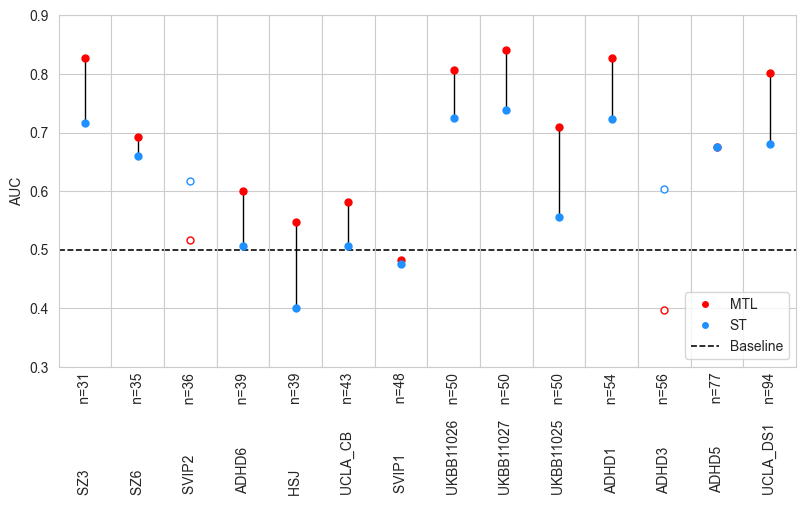

In [69]:
#######
# AUC #
#######
title = 'Sex - Single vs Multi-Task - MLPconn'
fig,ax = plt.subplots(1,len(sites),figsize=(8,5),sharey=True,sharex=True)
sns.set_style('whitegrid')
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']

for j,site in enumerate(sites):
    st_auc = df.loc[site]['ST_mean_auc']
    mtl_auc = df.loc[site]['MTL_mean_auc']
    if st_auc > mtl_auc:
        mfc_mtl = 'white'
        mfc_st = 'white'
        ls =''
    else:
        mfc_mtl = colors[2]
        mfc_st = colors[-2]
        ls = '-'

    ax[j].plot((5,5),(st_auc,mtl_auc),color=colors[0],ls=ls,linewidth=1)
    ax[j].plot(5,mtl_auc,marker='o',color=colors[2],ms=5,markerfacecolor=mfc_mtl)
    ax[j].plot(5,st_auc,marker='o',color=colors[-2],ms=5,markerfacecolor=mfc_st)
    ax[j].set_xticklabels([])
    ax[j].set_xticks([])
    ax[j].set_xlabel(site_labels[j],rotation=90)

    lines = ax[j].get_ygridlines()
    b = lines[2]
    b.set_color('black')
    b.set_linewidth(1.15)
    b.set_linestyle('--')

from matplotlib.lines import Line2D
handles = [Line2D([0], [0], marker='o',color='w', label='MTL',
                          markerfacecolor=colors[2]),
        Line2D([0], [0], marker='o', color='w', label='ST',
                          markerfacecolor=colors[-2]),
        Line2D([0], [0], color='black', label='Baseline',
                           linewidth=1.15,ls='--'),
                          ]
labels = ['MTL','ST','Baseline']
fig.legend(handles, labels, loc=(0.85,0.29))

ax[0].set_ylabel('AUC')
#plt.suptitle(title)
plt.ylim(0.3,0.9)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join('./figures/sex_auc.png'),dpi=300)

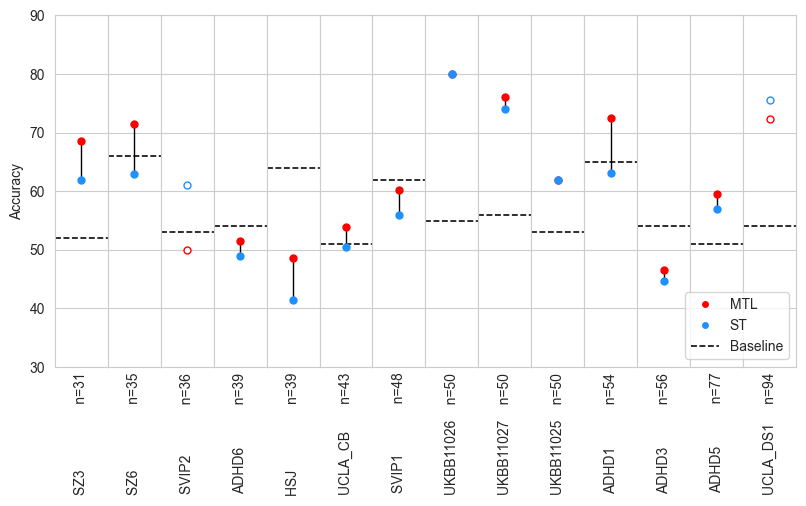

In [73]:
############
# ACCURACY #
############
# 51 - ADHD3, UCLA_CB           3
# 52 - SZ3                      4
# 53 - Svip2, UKBB11025         5
# 54 - ADHD3, ADHD6, UCLA_DS1   6
# 55 - UKBB11026                7
# 56 - UKBB11027                8
# 62 - Svip1                    10
# 64 - HSJ                      11
# 65 - ADHD1                    12
# 66 - SZ6                      13
special_lines = {3:['ADHD5','UCLA_CB'],
                 4: ['SZ3'],
                 5: ['Svip2','UKBB11025'],
                 6: ['ADHD3','ADHD6','UCLA_DS1'],
                 7: ['UKBB11026'],
                 8: ['UKBB11027'],
                 10: ['Svip1'],
                 11: ['HSJ'],
                 12: ['ADHD1'],
                 13: ['SZ6']}
title = 'Sex - Single vs Multi-Task - MLPconn'
fig,ax = plt.subplots(1,len(sites),figsize=(8,5),sharey=True,sharex=True)
plt.yticks([30,40,50,51,52,53,54,55,56,60,62,64,65,66,70,80,90],
           labels=[30,40,50,None,None,None,None,None,None,60,None,None,None,None,70,80,90])
sns.set_style('whitegrid')
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']

for j,site in enumerate(sites):
    st_acc = df.loc[site]['ST_mean_acc']
    mtl_acc = df.loc[site]['MTL_mean_acc']
    if st_acc > mtl_acc:
        mfc_mtl = 'white'
        mfc_st = 'white'
        ls =''
    else:
        mfc_mtl = colors[2]
        mfc_st = colors[-2]
        ls = '-'

    ax[j].plot((5,5),(st_acc,mtl_acc),color=colors[0],ls=ls,linewidth=1)
    ax[j].plot(5,mtl_acc,marker='o',color=colors[2],ms=5,markerfacecolor=mfc_mtl)
    ax[j].plot(5,st_acc,marker='o',color=colors[-2],ms=5,markerfacecolor=mfc_st)
    ax[j].set_xticklabels([])
    ax[j].set_xticks([])
    ax[j].set_xlabel(site_labels[j],rotation=90)

    lines = ax[j].get_ygridlines()
    for ll in special_lines.keys():
        if site in special_lines[ll]:
            # 3 black
            b = lines[ll]
            b.set_color('black')
            b.set_linewidth(1.15)
            b.set_linestyle('--')

            for ii in special_lines.keys():
                if ii != ll:
                    w1 = lines[ii]
                    w1.set_color('white')
                    w1.set_linewidth(1.15)
                    w1.set_linestyle('-')

from matplotlib.lines import Line2D
handles = [Line2D([0], [0], marker='o',color='w', label='MTL',
                          markerfacecolor=colors[2]),
        Line2D([0], [0], marker='o', color='w', label='ST',
                          markerfacecolor=colors[-2]),
        Line2D([0], [0], color='black', label='Baseline',
                           linewidth=1.15,ls='--'),
                          ]
labels = ['MTL','ST','Baseline']
fig.legend(handles, labels, loc=(0.85,0.29))

ax[0].set_ylabel('Accuracy')
#plt.suptitle(title)
plt.ylim(30,90)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join('./figures/sex_acc.png'),dpi=300)